# Zad 1

In [1]:
import numpy as np
from numpy.fft import fft, ifft

In [2]:
def fourier_matrix(n):
    w = np.e**(complex(0,-2*np.pi/n))
    return np.fromfunction(lambda i,j: w**(i*j), (n,n), dtype=np.complex)

np.round(fourier_matrix(3),4)

array([[ 1. +0.j   ,  1. +0.j   ,  1. +0.j   ],
       [ 1. +0.j   , -0.5-0.866j, -0.5+0.866j],
       [ 1. +0.j   , -0.5+0.866j, -0.5-0.866j]])

In [3]:
np.e**(complex(0,-2*np.pi/n))

NameError: name 'n' is not defined

In [4]:
def simple_DFT(v):
    v = v.squeeze()
    n = v.shape[0]
    W = fourier_matrix(n)
    return W @ v

v = np.random.random(10)
print(v)
np.allclose(simple_DFT(v), fft(v))

[0.97345862 0.87309329 0.05888052 0.75379427 0.67602948 0.9477119
 0.06149662 0.56480012 0.63806697 0.28448021]


True

In [5]:
def simple_IDFT_1(v):
    v = v.squeeze()
    n = v.shape[0]
    W = np.conj(fourier_matrix(n))
    return W @ v  /n

def simple_IDFT_2(v):
    v = v.squeeze()
    n = v.shape[0]
    W = np.linalg.pinv(fourier_matrix(n))
    return W @ v

print(np.allclose(simple_IDFT(simple_DFT(v)), simple_IDFT_2(simple_DFT(v))))
np.allclose(simple_IDFT(simple_DFT(v)), ifft(fft(v)))

NameError: name 'simple_IDFT' is not defined

In [6]:
def ct_fft(v):
    v = np.array(v)
    N = v.shape[0]
    
    if N % 2 > 0 and N!=1:
        raise ValueError("size of x must be a power of 2")
    if N == 1: 
        return v
    else:
        v_even = ct_fft(v[::2])
        v_odd = ct_fft(v[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([v_even + factor[:N // 2] * v_odd,
                               v_even + factor[N // 2:] * v_odd])
v = np.random.random(32)
np.allclose(ct_fft(v), fft(v))

True

In [7]:
%%timeit
simple_DFT(v)

293 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%%timeit
ct_fft(v)

518 µs ± 178 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit
fft(v)

3.91 µs ± 875 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
v = np.random.random(2**12)

In [13]:
%%timeit
simple_DFT(v)

6.48 s ± 551 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
ct_fft(v)

59 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
fft(v)

87.7 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Zad 2

In [20]:
import matplotlib.pyplot as plt

In [65]:
x = np.linspace(0, 2*np.pi, 33)
freq = [1,2,4]
y_sum = np.sum([np.sin(f*x) for f in freq], axis=0)
part = x.shape[0] // len(freq)
y_concat = np.concatenate([np.sin(f*x[i*part:(i+1)*part]) for i,f in enumerate(freq)])

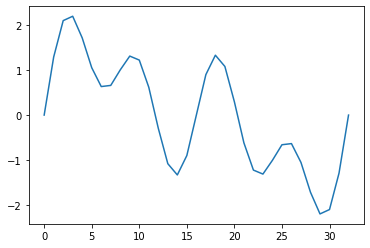

In [73]:
plt.plot(y_sum)

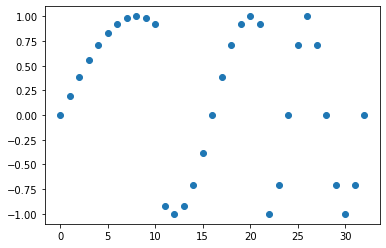

In [67]:
plt.plot(y_concat, 'o')

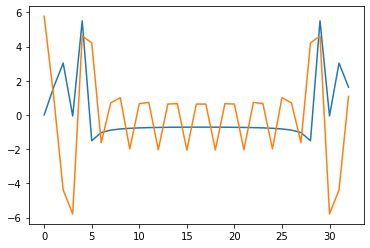

In [72]:
plt.plot(np.real(fft(y_sum)))
plt.plot(np.real(fft(y_concat)))
plt.show()

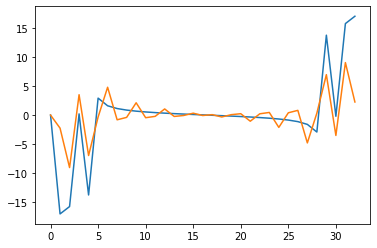

In [69]:
plt.plot(np.imag(fft(y_sum)))
plt.plot(np.imag(fft(y_concat)))
plt.show()